# NYC flight delays 2013

Do some vital loading!

In [1]:
%matplotlib inline
import pandas as pd

In [65]:
flights = pd.read_csv("flights.csv")

In [66]:
flights

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,7,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,8,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,9,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


In [33]:
flights.shape

(336776, 19)

### Some example playing about with daily stats

In [76]:
flights[["month", "day", "dep_delay"]].groupby(["month", "day"]).count().sort_values("dep_delay", ascending = False)

dep_delay
month day           
12    2         1001
8     5          998
7     31         997
11    21         997
8     7          995
      15         995
7     15         994
11    22         993
8     12         993
      14         993
9     26         993
10    18         992
      3          992
9     27         992
10    17         991
8     16         991
4     3          990
      15         990
7     17         990
6     20         990
8     6          990
      19         990
9     9          989
10    4          989
7     26         989
6     21         989
7     16         989
10    24         988
      21         988
7     12         988
...              ...
2     16         737
7     4          734
5     26         729
      25         727
1     5          717
9     1          717
12    25         715
11    9          714
      16         711
5     11         703
9     21         690
      7          687
10    5          687
1     12         684
9     14         684
10    19         682
11    2          682
10    26         682
2     2          680
9     28         679
8     31         676
10    12         674
1     19         673
12    7          673
1     26         671
11    29         661
      28         634
12    14         567
2     8          458
      9          291

[365 rows x 1 columns]

Now we'll construct a decimal time for ease of plotting

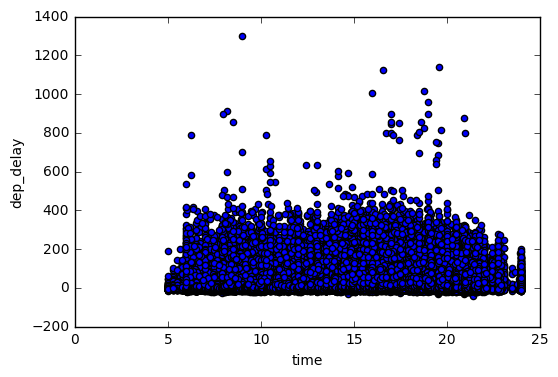

In [34]:
flights["time"] = flights["hour"] + flights["minute"]/60.
flights.plot(x="time", y="dep_delay", kind="scatter", style='.')

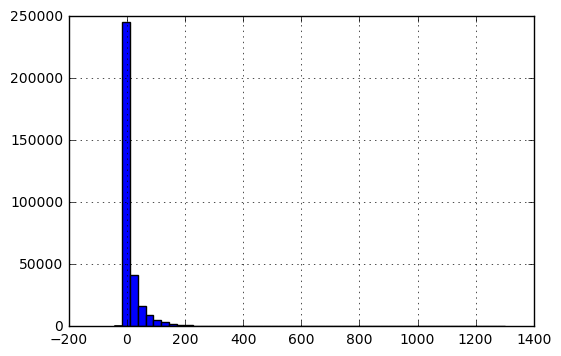

In [77]:
flights["dep_delay"].hist(bins=50)

In [44]:
flights[["dep_delay", "tailnum"]].groupby("tailnum").mean()

,dep_delay
tailnum,
D942DN,31.500000
N0EGMQ,8.491525
N10156,17.815068
N102UW,8.000000
N103US,-3.195652
N104UW,9.936170
N10575,22.650735
N105UW,2.577778
N107US,-0.463415


## Find the worst carriers for average delay

In [61]:
worst_carriers = flights[["dep_delay", "carrier"]].groupby("carrier").mean().sort_values('dep_delay', ascending=False).head(5)
worst_carriers = worst_carriers.reset_index()

In [62]:
airlines = pd.read_csv("airlines.csv")
airlines.head(5)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [64]:
worst_carriers = pd.merge(worst_carriers, airlines, how='left')

In [65]:
worst_carriers

,carrier,dep_delay,name
0,F9,20.215543,Frontier Airlines Inc.
1,EV,19.955390,ExpressJet Airlines Inc.
2,YV,18.996330,Mesa Airlines Inc.
3,FL,18.726075,AirTran Airways Corporation
4,WN,17.711744,Southwest Airlines Co.


## Find the worst aircraft home cities
How? Use new data source from FAA!

In [78]:
faa_master = pd.read_csv("/media/guy/USBEnc/python_for_data_science/faa_data/MASTER.txt")

In [79]:
faa_master

,﻿N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,1,1071,3980115,54556,1988,5,FEDERAL AVIATION ADMINISTRATION ...,WASHINGTON REAGAN NATIONAL ARPT,3201 THOMAS AVE HANGAR 6,WASHINGTON,...,...,...,...,...,20191130,524101,,,A00001,NaN
1,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,...,20200430,600060,,,A004B3,NaN
2,10001,A28,9601202,67007,1928,1,PERRY AARON O ...,PO BOX 736,,MULBERRY,...,...,...,...,...,20190630,432072,,,A00726,NaN
3,10002,79-030,8930105,41525,1979,4,ENGLISH MARK ...,655 DOESKIN TRL,,SANTA MARIA,...,...,...,...,...,20180131,831480,,,A00727,NaN
4,10003,1,056336T,,,1,CAMPBELL CHARLES N ...,604 CORDOVA CT,,SALISBURY,...,...,...,...,...,20180331,1173853,,,A00728,NaN
5,10004,T18208245,2072738,,,3,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,...,...,...,...,20190331,102879,,,A00729,NaN
6,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,...,...,...,...,20180228,480110,,,A0072B,NaN
7,10007,21058839,2073430,17032,1966,3,WATERMAN EXCAVATING INC ...,2 GAVIN AVE,,ADAMS,...,...,...,...,...,20190331,470110,,,A0072C,NaN
8,10008,2540,056112C,99999,2001,1,RESIDE JOHN S ...,1655 REED RD,,PENNINGTON,...,...,...,...,...,20150531,614074,,,A0072D,NaN
9,10009,79-032,8930105,41525,1979,3,HENDRICKSON FLYING SERVICE INC ...,21532 QUITNO RD,,ROCHELLE,...,...,...,...,...,20190831,460110,,,A0072E,NaN


Now we'll weed out some missing tailnumbers and select just "N..." numbers (for matching FAA data)

In [84]:
flights = flights[pd.notnull(flights["tailnum"])]
flights_n = flights[flights["tailnum"].str.startswith("N")]

In [85]:
flights_n

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,7,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,8,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,9,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


In [88]:
faa_master["N-NUMBER"] = faa_master["\xef\xbb\xbfN-NUMBER"]

In [89]:
faa_master["tailnum"] = "N"+faa_master["N-NUMBER"]

In [100]:
flights_n = pd.merge(flights_n, faa_master, how="inner")

In [101]:
flights_n.shape

(267556, 56)

In [102]:
flights_n[["tailnum", "N-NUMBER"]].head()

,tailnum,N-NUMBER
0,N14228,14228
1,N14228,14228
2,N14228,14228
3,N14228,14228
4,N14228,14228


In [103]:
worst_cities = flights_n[["dep_delay", "CITY"]].groupby("CITY").mean().sort_values('dep_delay', ascending=False).head(5)
worst_cities = worst_carriers.reset_index()

In [104]:
worst_cities

,index,CITY,dep_delay
0,0,WINDSOR,46.333333
1,1,LEWES,46.250000
2,2,BULLHEAD CITY,32.451613
3,3,EDMOND,32.000000
4,4,STORMVILLE,30.166667


Bullhead City and Stormville sound inspiring!